# Classes

## Classes and Functions

At this point you know how to use functions to organize code and how to use built-in types to organize data.
The next step is **object-oriented programming**, which uses programmer-defined types to organize both code and data.

Object-oriented programming is a big topic, so we will proceed gradually.
In this chapter, we'll start with code that is not idiomatic -- that is, it is not the kind of code experienced programmers write -- but it is a good place to start.
In the next two chapters, we will use additional features to write more idiomatic code.

In [1]:
import thinkpython, diagram, jupyturtle, download

### Programmer-defined types

We have used many of Python's built-in types -- now we will define a new type.
As a first example, we'll create a type called `Time` that represents a time of day.
A programmer-defined type is also called a **class**.
A class definition looks like this:

In [2]:
class Time:
    """Represents a time of day."""

The header indicates that the new class is called `Time`.
The body is a docstring that explains what the class is for.
Defining a class creates a **class object**.

The class object is like a factory for creating objects.
To create a `Time` object, you call `Time` as if it were a function.

In [3]:
lunch = Time()

The result is a new object whose type is `__main__.Time`, where `__main__` is the name of the  module where `Time` is defined.

In [4]:
type(lunch)

__main__.Time

When you print an object, Python tells you what type it is and where it is stored in memory (the prefix `0x` means that the following number is in hexadecimal).

In [5]:
print(lunch)

Creating a new object is called **instantiation**, and the object is an **instance** of the class.

### Attributes

An object can contain variables, which are called **attributes** and pronounced with the emphasis on the first syllable, like "AT-trib-ute", rather than the second syllable, like "a-TRIB-ute".
We can create attributes using dot notation.

In [6]:
lunch.hour = 11
lunch.minute = 59
lunch.second = 1

This example creates attributes called `hour`, `minute`, and `second`, which contain the hours, minutes, and seconds of the time `11:59:01`, which is lunch time as far as I am concerned.

The following diagram shows the state of `lunch` and its attributes after these assignments. 

In [7]:
from diagram import make_frame, make_binding

d1 = dict(hour=11, minute=59, second=1)
frame = make_frame(d1, name='Time', dy=-0.3, offsetx=0.48)
binding = make_binding('lunch', frame)

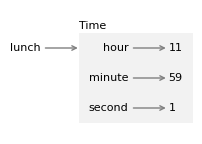

In [8]:
from diagram import diagram, adjust

width, height, x, y = [1.77, 1.24, 0.25, 0.86]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

The variable `lunch` refers to a `Time` object, which contains three attributes. 
Each attribute refers to an integer.
A state diagram like this -- which shows an object and its attributes -- is called an **object diagram**.

You can read the value of an attribute using the dot operator.

In [9]:
lunch.hour

11

You can use an attribute as part of any expression.

In [10]:
total_minutes = lunch.hour * 60 + lunch.minute
total_minutes

719

And you can use the dot operator in an expression in an f-string.

In [11]:
f'{lunch.hour}:{lunch.minute}:{lunch.second}'

'11:59:1'

But notice that the previous example is not in the standard format.
To fix it, we have to print the `minute` and `second` attributes with a leading zero.
We can do that by extending the expressions in curly braces with a **format specifier**.
In the following example, the format specifiers indicate that `minute` and `second` should be displayed with at least two digits and a leading zero if needed.

In [12]:
f'{lunch.hour}:{lunch.minute:02d}:{lunch.second:02d}'

'11:59:01'

We'll use this f-string to write a function that displays the value of a `Time`object.
You can pass an object as an argument in the usual way.
For example, the following function takes a `Time` object as an argument. 

In [13]:
def print_time(time):
    s = f'{time.hour:02d}:{time.minute:02d}:{time.second:02d}'
    print(s)

When we call it, we can pass `lunch` as an argument.

In [14]:
print_time(lunch)

11:59:01


### Objects as return values

Functions can return objects. For example, `make_time` takes parameters called `hour`, `minute`, and `second`, stores them as attributes in a `Time` object, and returns the new object.

In [15]:
def make_time(hour, minute, second):
    time = Time()
    time.hour = hour
    time.minute = minute
    time.second = second
    return time

It might be surprising that the parameters have the same names as the attributes, but that's a common way to write a function like this.
Here's how we use `make_time` to create a `Time` object.

In [16]:
time = make_time(11, 59, 1)
print_time(time)

11:59:01


### Objects are mutable

Suppose you are going to a screening of a movie, like *Monty Python and the Holy Grail*, which starts at `9:20 PM` and runs for `92` minutes, which is one hour `32` minutes.
What time will the movie end?

First, we'll create a `Time` object that represents the start time.

In [17]:
start = make_time(9, 20, 0)
print_time(start)

09:20:00


To find the end time, we can modify the attributes of the `Time` object, adding the duration of the movie.

In [18]:
start.hour += 1
start.minute += 32
print_time(start)

10:52:00


The movie will be over at 10:52 PM.

Let's encapsulate this computation in a function and generalize it to take the duration of the movie in three parameters: `hours`, `minutes`, and `seconds`.

In [19]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

Here is an example that demonstrates the effect.

In [20]:
start = make_time(9, 20, 0)
increment_time(start, 1, 32, 0)
print_time(start)

10:52:00


The following stack diagram shows the state of the program just before `increment_time` modifies the object.

In [21]:
from diagram import Frame, Binding, Value, Stack

d1 = dict(hour=9, minute=20, second=0)
obj1 = make_frame(d1, name='Time', dy=-0.25, offsetx=0.78)

binding1 = make_binding('start', frame, draw_value=False, dx=0.7)
frame1 = Frame([binding1], name='__main__', loc='left', offsetx=-0.2)

binding2 = Binding(Value('time'), draw_value=False, dx=0.7, dy=0.35)
binding3 = make_binding('hours', 1)
binding4 = make_binding('minutes',32)
binding5 = make_binding('seconds', 0)
frame2 = Frame([binding2, binding3, binding4, binding5], name='increment_time', 
               loc='left', dy=-0.25, offsetx=0.08)

stack = Stack([frame1, frame2], dx=-0.3, dy=-0.5)

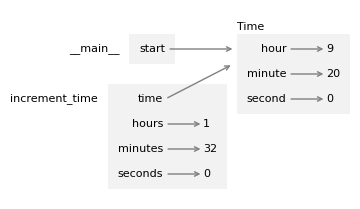

In [22]:
from diagram import Bbox

width, height, x, y = [3.4, 1.89, 1.75, 1.5]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = obj1.draw(ax, x+0.23, y)
bbox = Bbox.union([bbox1, bbox2])
# adjust(x, y, bbox)

Inside the function, `time` is an alias for `start`, so when `time` is modified, `start` changes.

This function works, but after it runs, we're left with a variable named `start` that refers to an object that represents the *end* time, and we no longer have an object that represents the start time.
It would be better to leave `start` unchanged and make a new object to represent the end time.
We can do that by copying `start` and modifying the copy.

### Copying

The `copy` module provides a function called `copy` that can duplicate any object.
We can import it like this.

In [23]:
from copy import copy

To see how it works, let's start with a new `Time` object that represents the start time of the movie.

In [24]:
start = make_time(9, 20, 0)

And make a copy.

In [25]:
end = copy(start)

Now `start` and `end` contain the same data.

In [26]:
print_time(start)
print_time(end)

09:20:00
09:20:00


But the `is` operator confirms that they are not the same object.

In [27]:
start is end

False

Let's see what the `==` operator does.

In [28]:
start == end

False

You might expect `==` to yield `True` because the objects contain the same data.
But for programmer-defined classes, the default behavior of the `==` operator is the same as the `is` operator -- it checks identity, not equivalence.

### Pure functions

We can use `copy` to write pure functions that don't modify their parameters.
For example, here's a function that takes a `Time` object and a duration in hours, minutes and seconds.
It makes a copy of the original object, uses `increment_time` to modify the copy, and returns it.

In [29]:
def add_time(time, hours, minutes, seconds):
    total = copy(time)
    increment_time(total, hours, minutes, seconds)
    return total

Here's how we use it.

In [30]:
end = add_time(start, 1, 32, 0)
print_time(end)

10:52:00


The return value is a new object representing the end time of the movie.
And we can confirm that `start` is unchanged.

In [31]:
print_time(start)

09:20:00


`add_time` is a **pure function** because it does not modify any of the objects passed to it as arguments and its only effect is to return a value.

Anything that can be done with impure functions can also be done with pure functions.
In fact, some programming languages only allow pure functions.
Programs that use pure functions might be less error-prone, but impure functions are sometimes convenient and can be more efficient.

In general, I suggest you write pure functions whenever it is reasonable and resort to impure functions only if there is a compelling advantage.
This approach might be called a **functional programming style**.

### Prototype and patch

In the previous example, `increment_time` and `add_time` seem to work, but if we try another example, we'll see that they are not quite correct.

Suppose you arrive at the theater and discover that the movie starts at `9:40`, not `9:20`.
Here's what happens when we compute the updated end time.

In [32]:
start = make_time(9, 40, 0)
end = add_time(start, 1, 32, 0)
print_time(end)

10:72:00


The result is not a valid time.
The problem is that `increment_time` does not deal with cases where the number of seconds or minutes adds up to more than `60`.

Here's an improved version that checks whether `second` exceeds or equals `60` -- if so, it increments `minute` -- then checks whether `minute` exceeds or equals `60` -- if so, it increments `hour`.

In [33]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

    if time.second >= 60:
        time.second -= 60
        time.minute += 1

    if time.minute >= 60:
        time.minute -= 60
        time.hour += 1

Fixing `increment_time` also fixes `add_time`, which uses it.
So now the previous example works correctly.

In [34]:
end = add_time(start, 1, 32, 0)
print_time(end)

11:12:00


But this function is still not correct, because the arguments might be bigger than `60`.
For example, suppose we are given the run time as `92` minutes, rather than `1` hours and `32` minutes.
We might call `add_time` like this.

In [35]:
end = add_time(start, 0, 92, 0)
print_time(end)

10:72:00


The result is not a valid time.
So let's try a different approach, using the `divmod` function.
We'll make a copy of `start` and modify it by incrementing the `minute` attribute.

In [36]:
end = copy(start)
end.minute = start.minute + 92
end.minute

132

Now `minute` is `132`, which is `2` hours and `12` minutes.
We can use `divmod` to divide by `60` and return the number of whole hours and the number of minutes left over.

In [37]:
carry, end.minute = divmod(end.minute, 60)
carry, end.minute

(2, 12)

Now `minute` is correct, and we can add the hours to `hour`.

In [38]:
end.hour += carry
print_time(end)

11:12:00


The result is a valid time.
We can do the same thing with `hour` and `second`, and encapsulate the whole process in a function.

In [39]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds
    
    carry, time.second = divmod(time.second, 60)
    carry, time.minute = divmod(time.minute + carry, 60)
    carry, time.hour = divmod(time.hour + carry, 24)

With this version of `increment_time`, `add_time` works correctly, even if the arguments exceed `60`.

In [40]:
end = add_time(start, 0, 90, 120)
print_time(end)

11:12:00


This section demonstrates a program development plan I call **prototype and patch**.
We started with a simple prototype that worked correctly for the first example.
Then we tested it with more difficult examples -- when we found an error, we modified the program to fix it, like putting a patch on tire with a puncture.

This approach can be effective, especially if you don't yet have a deep understanding of the problem.
But incremental corrections can generate code that is unnecessarily complicated -- since it deals with many special cases -- and unreliable -- since it is hard to know if you have
found all the errors.

## Design-first development

An alternative plan is **design-first development**, which involves more planning before prototyping. In a design-first process, sometimes a high-level insight into the problem makes the programming much easier.

In this case, the insight is that we can think of a `Time` object as a three-digit number in base 60 -- also known as sexagesimal.
The `second` attribute is the "ones column", the `minute` attribute is the "sixties column",
and the `hour` attribute is the "thirty-six hundreds column".
When we wrote `increment_time`, we were effectively doing addition in base 60, which is why we had to carry from one column to the next.

This observation suggests another approach to the whole problem -- we can convert `Time` objects to integers and take advantage of the fact that Python knows how to do integer arithmetic.

Here is a function that converts from a `Time` to an integer.

In [41]:
def time_to_int(time):
    minutes = time.hour * 60 + time.minute
    seconds = minutes * 60 + time.second
    return seconds

The result is the number of seconds since the beginning of the day.
For example, `01:01:01` is `1` hour, `1` minute and `1` second from the beginning of the day, which is the sum of `3600` seconds, `60` seconds, and `1` second.

In [42]:
time = make_time(1, 1, 1)
print_time(time)
time_to_int(time)

01:01:01


3661

And here's a function that goes in the other direction -- converting an integer to a `Time` object -- using the `divmod` function.

In [43]:
def int_to_time(seconds):
    minute, second = divmod(seconds, 60)
    hour, minute = divmod(minute, 60)
    return make_time(hour, minute, second)

We can test it by converting the previous example back to a `Time`.

In [44]:
time = int_to_time(3661)
print_time(time)

01:01:01


Using these functions, we can write a more concise version of `add_time`.

In [45]:
def add_time(time, hours, minutes, seconds):
    duration = make_time(hours, minutes, seconds)
    seconds = time_to_int(time) + time_to_int(duration)
    return int_to_time(seconds)

The first line converts the arguments to a `Time` object called `duration`.
The second line converts `time` and `duration` to seconds and adds them.
The third line converts the sum to a `Time` object and returns it.

Here's how it works.

In [46]:
start = make_time(9, 40, 0)
end = add_time(start, 1, 32, 0)
print_time(end)

11:12:00


In some ways, converting from base 60 to base 10 and back is harder than
just dealing with times. Base conversion is more abstract; our intuition
for dealing with time values is better.

But if we have the insight to treat times as base 60 numbers -- and invest the effort to write the conversion functions `time_to_int` and `int_to_time` -- we get a program that is shorter, easier to read and debug, and more reliable.

It is also easier to add features later. For example, imagine subtracting two `Time` objects to find the duration between them.
The naive approach is to implement subtraction with borrowing.
Using the conversion functions is easier and more likely to be correct.

Ironically, sometimes making a problem harder -- or more general -- makes it easier, because there are fewer special cases and fewer opportunities for error.

### Classes and Methods

Python is an **object-oriented language** -- that is, it provides features that support object-oriented programming, which has these defining characteristics:

-   Most of the computation is expressed in terms of operations on objects.

-   Objects often represent things in the real world, and methods often correspond to the ways things in the real world interact.

-   Programs include class and method definitions.

For example, in the previous chapter we defined a `Time` class that corresponds to the way people record the time of day, and we defined functions that correspond to the kinds of things people do with times.
But there was no explicit connection between the definition of the `Time` class and the function definitions that follow.
We can make the connection explicit by rewriting a function as a **method**, which is defined inside a class definition.

In [47]:
import thinkpython, diagram, jupyturtle

### Defining methods

In the previous chapter we defined a class named `Time` and wrote a function named `print_time` that displays a time of day.

In [48]:
class Time:
    """Represents the time of day."""

def print_time(time):
    s = f'{time.hour:02d}:{time.minute:02d}:{time.second:02d}'
    print(s)

To make `print_time` a method, all we have to do is move the function
definition inside the class definition. Notice the change in
indentation.

At the same time, we'll change the name of the parameter from `time` to `self`.
This change is not necessary, but it is conventional for the first parameter of a method to be named `self`.

In [49]:
class Time:
    """Represents the time of day."""    

    def print_time(self):
        s = f'{self.hour:02d}:{self.minute:02d}:{self.second:02d}'
        print(s)

To call this method, you have to pass a `Time` object as an argument.
Here's the function we'll use to make a `Time` object.

In [50]:
def make_time(hour, minute, second):
    time = Time()
    time.hour = hour
    time.minute = minute
    time.second = second
    return time

And here's a `Time` instance.

In [51]:
start = make_time(9, 40, 0)

Now there are two ways to call `print_time`. The first (and less common)
way is to use function syntax.

In [52]:
Time.print_time(start)

09:40:00


In this version, `Time` is the name of the class, `print_time` is the name of the method, and `start` is passed as a parameter.
The second (and more idiomatic) way is to use method syntax:

In [53]:
start.print_time()

09:40:00


In this version, `start` is the object the method is invoked on, which is called the **receiver**, based on the analogy that invoking a method is like sending a message to an object.

Regardless of the syntax, the behavior of the method is the same.
The receiver is assigned to the first parameter, so inside the method, `self` refers to the same object as `start`.

### Another method

Here's the `time_to_int` function from the previous chapter.

In [54]:
def time_to_int(time):
    minutes = time.hour * 60 + time.minute
    seconds = minutes * 60 + time.second
    return seconds

And here's a version rewritten as a method.


In [55]:
%%add_method_to Time

    def time_to_int(self):
        minutes = self.hour * 60 + self.minute
        seconds = minutes * 60 + self.second
        return seconds

The first line uses the special command `add_method_to`, which adds a method to a previously-defined class.
This command works in a Jupyter notebook, but it is not part of Python, so it won't work in other environments.
Normally, all methods of a class are inside the class definition, so they get defined at the same time as the class.
But for this book, it is helpful to define one method at a time.

As in the previous example, the method definition is indented and the name of the parameter is `self`.
Other than that, the method is identical to the function.
Here's how we invoke it.

In [56]:
start.time_to_int()

34800

It is common to say that we "call" a function and "invoke" a method, but they mean the same thing.

### Static methods

As another example, let's consider the `int_to_time` function.
Here's the version from the previous chapter.

In [57]:
def int_to_time(seconds):
    minute, second = divmod(seconds, 60)
    hour, minute = divmod(minute, 60)
    return make_time(hour, minute, second)

This function takes `seconds` as a parameter and returns a new `Time` object.
If we transform it into a method of the `Time` class, we have to invoke it on a `Time` object.
But if we're trying to create a new `Time` object, what are we supposed to invoke it on?

We can solve this chicken-and-egg problem using a **static method**, which is a method that does not require an instance of the class to be invoked.
Here's how we rewrite this function as a static method.

In [58]:
%%add_method_to Time

    def int_to_time(seconds):
        minute, second = divmod(seconds, 60)
        hour, minute = divmod(minute, 60)
        return make_time(hour, minute, second)

Because it is a static method, it does not have `self` as a parameter.
To invoke it, we use `Time`, which is the class object.

In [59]:
start = Time.int_to_time(34800)

The result is a new object that represents 9:40.

In [60]:
start.print_time()

09:40:00


Now that we have `Time.from_seconds`, we can use it to write `add_time` as a method.
Here's the function from the previous chapter.

In [61]:
def add_time(time, hours, minutes, seconds):
    duration = make_time(hours, minutes, seconds)
    seconds = time_to_int(time) + time_to_int(duration)
    return int_to_time(seconds)

And here's a version rewritten as a method.

In [62]:
%%add_method_to Time

    def add_time(self, hours, minutes, seconds):
        duration = make_time(hours, minutes, seconds)
        seconds = time_to_int(self) + time_to_int(duration)
        return Time.int_to_time(seconds)

`add_time` has `self` as a parameter because it is not a static method.
It is an ordinary method -- also called an **instance method**.
To invoke it, we need a `Time` instance.

In [63]:
end = start.add_time(1, 32, 0)
print_time(end)

11:12:00


### Comparing Time objects

As one more example, let's write `is_after` as a method.
Here's the `is_after` function, which is a solution to an exercise in the previous chapter.

In [64]:
def is_after(t1, t2):
    return time_to_int(t1) > time_to_int(t2)

And here it is as a method.

In [65]:
%%add_method_to Time

    def is_after(self, other):
        return self.time_to_int() > other.time_to_int()

Because we're comparing two objects, and the first parameter is `self`, we'll call the second parameter `other`.
To use this method, we have to invoke it on one object and pass the
other as an argument.

In [66]:
end.is_after(start)

True

One nice thing about this syntax is that it almost reads like a question,
"`end` is after `start`?"

### The `__str__` method

When you write a method, you can choose almost any name you want.
However, some names have special meanings.
For example, if an object has a method named `__str__`, Python uses that method to convert the object to a string.
For example, here is a `__str__` method for a time object.

In [67]:
%%add_method_to Time

    def __str__(self):
        s = f'{self.hour:02d}:{self.minute:02d}:{self.second:02d}'
        return s

This method is similar to `print_time`, from the previous chapter, except that it returns the string rather than printing it.

You can invoke this method in the usual way.

In [68]:
end.__str__()

'11:12:00'

But Python can also invoke it for you.
If you use the built-in function `str` to convert a `Time` object to a string, Python uses the `__str__` method in the `Time` class.

In [69]:
str(end)

'11:12:00'

And it does the same if you print a `Time` object.

In [70]:
print(end)

11:12:00


Methods like `__str__` are called **special methods**.
You can identify them because their names begin and end with two underscores.

### The init method

The most special of the special methods is `__init__`, so-called because it initializes the attributes of a new object.
An `__init__` method for the `Time` class might look like this:

In [71]:
%%add_method_to Time

    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second

Now when we instantiate a `Time` object, Python invokes `__init__`, and passes along the arguments.
So we can create an object and initialize the attributes at the same time.

In [72]:
time = Time(9, 40, 0)
print(time)

09:40:00


In this example, the parameters are optional, so if you call `Time` with no arguments,
you get the default values.

In [73]:
time = Time()
print(time)

00:00:00


If you provide one argument, it overrides `hour`:

In [74]:
time = Time(9)
print(time)

09:00:00


If you provide two arguments, they override `hour` and `minute`.

In [75]:
time = Time(9, 45)
print(time)

09:45:00


And if you provide three arguments, they override all three default
values.

When I write a new class, I almost always start by writing `__init__`, which makes it easier to create objects, and `__str__`, which is useful for debugging.

##E Operator overloading

By defining other special methods, you can specify the behavior of
operators on programmer-defined types. For example, if you define a
method named `__add__` for the `Time` class, you can use the `+`
operator on Time objects.

Here is an `__add__` method.

In [76]:
%%add_method_to Time

    def __add__(self, other):
        seconds = self.time_to_int() + other.time_to_int()
        return Time.int_to_time(seconds)

We can use it like this.

In [77]:
duration = Time(1, 32)
end = start + duration
print(end)

11:12:00


There is a lot happening when we run these three lines of code:

* When we instantiate a `Time` object, the `__init__` method is invoked.

* When we use the `+` operator with a `Time` object, its `__add__` method is invoked.

* And when we print a `Time` object, its `__str__` method is invoked.

Changing the behavior of an operator so that it works with programmer-defined types is called **operator overloading**.
For every operator, like `+`, there is a corresponding special method, like `__add__`. 

## Classes and Objects

At this point we have defined classes and created objects that represent the time of day and the day of the year.
And we've defined methods that create, modify, and perform computations with these objects.

In this chapter we'll continue our tour of object-oriented programming (OOP) by defining classes that represent geometric objects, including points, lines, rectangles, and circles.
We'll write methods that create and modify these objects, and we'll use the `jupyturtle` module to draw them.

I'll use these classes to demonstrate OOP topics including object identity and equivalence, shallow and deep copying, and polymorphism.

In [78]:
import thinkpython, diagram, jupyturtle

### Creating a Point

In computer graphics a location on the screen is often represented using a pair of coordinates in an `x`-`y` plane.
By convention, the point `(0, 0)` usually represents the upper-left corner of the screen, and  `(x, y)` represents the point `x` units to the right and `y` units down from the origin.
Compared to the Cartesian coordinate system you might have seen in a math class, the `y` axis is upside-down.

There are several ways we might represent a point in Python:

-   We can store the coordinates separately in two variables, `x` and `y`.

-   We can store the coordinates as elements in a list or tuple.

-   We can create a new type to represent points as objects.

In object-oriented programming, it would be most idiomatic to create a new type.
To do that, we'll start with a class definition for `Point`.

In [79]:
class Point:
    """Represents a point in 2-D space."""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f'Point({self.x}, {self.y})'

The `__init__` method takes the coordinates as parameters and assigns them to attributes `x` and `y`.
The `__str__` method returns a string representation of the `Point`.

Now we can instantiate and display a `Point` object like this.

In [80]:
start = Point(0, 0)
print(start)

Point(0, 0)


The following diagram shows the state of the new object. 

In [81]:
from diagram import make_frame, make_binding

d1 = vars(start)
frame = make_frame(d1, name='Point', dy=-0.25, offsetx=0.18)
binding = make_binding('start', frame)

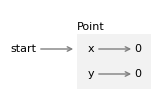

In [82]:
from diagram import diagram, adjust

width, height, x, y = [1.41, 0.89, 0.26, 0.5]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

As usual, a programmer-defined type is represented by a box with the name of the type outside and the attributes inside.

In general, programmer-defined types are mutable, so we can write a method like `translate` that takes two numbers, `dx` and `dy`, and adds them to the attributes `x` and `y`.

In [83]:
%%add_method_to Point

    def translate(self, dx, dy):
        self.x += dx
        self.y += dy

This function translates the `Point` from one location in the plane to another.
If we don't want to modify an existing `Point`, we can use `copy` to copy the original object and then modify the copy.

In [84]:
from copy import copy

end1 = copy(start)
end1.translate(300, 0)
print(end1)

Point(300, 0)


We can encapsulate those steps in another method called `translated`.

In [85]:
%%add_method_to Point

    def translated(self, dx=0, dy=0):
        point = copy(self)
        point.translate(dx, dy)
        return point

In the same way that the built in function `sort` modifies a list, and the `sorted` function creates a new list, now we have a `translate` method that modifies a `Point` and a `translated` method that creates a new one.

Here's an example:

In [86]:
end2 = start.translated(0, 150)
print(end2)

Point(0, 150)


In the next section, we'll use these points to define and draw a line.

### Creating a Line

Now let's define a class that represents the line segment between two points.
As usual, we'll start with an `__init__` method and a `__str__` method.

In [87]:
class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def __str__(self):
        return f'Line({self.p1}, {self.p2})'

With those two methods, we can instantiate and display a `Line` object we'll use to represent the `x` axis.

In [88]:
line1 = Line(start, end1)
print(line1)

Line(Point(0, 0), Point(300, 0))


When we call `print` and pass `line` as a parameter, `print` invokes `__str__` on `line`.
The `__str__` method uses an f-string to create a string representation of the `line`. 

The f-string contains two expressions in curly braces, `self.p1` and `self.p2`.
When those expressions are evaluated, the results are `Point` objects.
Then, when they are converted to strings, the `__str__` method from the `Point` class gets invoked.

That's why, when we display a `Line`, the result contains the string representations of the `Point` objects.

The following object diagram shows the state of this `Line` object.

In [89]:
from diagram import Binding, Value, Frame

d1 = vars(line1.p1)
frame1 = make_frame(d1, name='Point', dy=-0.25, offsetx=0.17)

d2 = vars(line1.p2)
frame2 = make_frame(d2, name='Point', dy=-0.25, offsetx=0.17)

binding1 = Binding(Value('start'), frame1, dx=0.4)
binding2 = Binding(Value('end'), frame2, dx=0.4)
frame3 = Frame([binding1, binding2], name='Line', dy=-0.9, offsetx=0.4, offsety=-0.25)

binding = make_binding('line1', frame3)

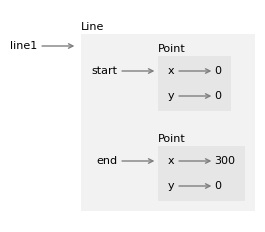

In [90]:
width, height, x, y = [2.45, 2.12, 0.27, 1.76]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

String representations and object diagrams are useful for debugging, but the point of this example is to generate graphics, not text!
So we'll use the `jupyturtle` module to draw lines on the screen.

As we did in [Chapter 4](section_turtle_module), we'll use `make_turtle` to create a `Turtle` object and a small canvas where it can draw.
To draw lines, we'll use two new functions from the `jupyturtle` module:

* `jumpto`, which takes two coordinates and moves the `Turtle` to the given location without drawing a line, and 

* `moveto`, which moves the `Turtle` from its current location to the given location, and draws a line segment between them.

Here's how we import them.

In [91]:
from jupyturtle import make_turtle, jumpto, moveto

And here's a method that draws a `Line`.

In [92]:
%%add_method_to Line

    def draw(self):
        jumpto(self.p1.x, self.p1.y)
        moveto(self.p2.x, self.p2.y)

To show how it's used, I'll create a second line that represents the `y` axis.

In [93]:
line2 = Line(start, end2)
print(line2)

Line(Point(0, 0), Point(0, 150))


And then draw the axes.

In [94]:
make_turtle()
line1.draw()
line2.draw()

As we define and draw more objects, we'll use these lines again.
But first let's talk about object equivalence and identity.

### Equivalence and identity

Suppose we create two points with the same coordinates.

In [95]:
p1 = Point(200, 100)
p2 = Point(200, 100)

If we use the `==` operator to compare them, we get the default behavior for programmer-defined types -- the result is `True` only if they are the same object, which they are not.

In [96]:
p1 == p2

False

If we want to change that behavior, we can provide a special method called `__eq__` that defines what it means for two `Point` objects to be equal.

In [97]:
%%add_method_to Point

def __eq__(self, other):
    return (self.x == other.x) and (self.y == other.y)

This definition considers two `Points` to be equal if their attributes are equal.
Now when we use the `==` operator, it invokes the `__eq__` method, which indicates that `p1` and `p2` are considered equal.

In [98]:
p1 == p2

True

But the `is` operator still indicates that they are different objects.

In [99]:
p1 is p2

False

It's not possible to override the `is` operator -- it always checks whether the objects are identical.
But for programmer-defined types, you can override the `==` operator so it checks whether the objects are equivalent.
And you can define what equivalent means.

### Creating a Rectangle

Now let's define a class that represents and draws rectangles.
To keep things simple, we'll assume that the rectangles are either vertical or horizontal, not at an angle.
What attributes do you think we should use to specify the location and size of a rectangle?

There are at least two possibilities:

-   You could specify the width and height of the rectangle and the location of one corner.

-   You could specify two opposing corners.

At this point it's hard to say whether either is better than the other, so let's implement the first one.
Here is the class definition.

In [100]:
class Rectangle:
    """Represents a rectangle. 

    attributes: width, height, corner.
    """
    def __init__(self, width, height, corner):
        self.width = width
        self.height = height
        self.corner = corner
        
    def __str__(self):
        return f'Rectangle({self.width}, {self.height}, {self.corner})'

As usual, the `__init__` method assigns the parameters to attributes and the `__str__` returns a string representation of the object.
Now we can instantiate a `Rectangle` object, using a `Point` as the location of the upper-left corner.

In [101]:
corner = Point(30, 20)
box1 = Rectangle(100, 50, corner)
print(box1)

Rectangle(100, 50, Point(30, 20))


The following diagram shows the state of this object.

In [102]:
from diagram import Binding, Value

def make_rectangle_binding(name, box, **options):
    d1 = vars(box.corner)
    frame_corner = make_frame(d1, name='Point', dy=-0.25, offsetx=0.07)

    d2 = dict(width=box.width, height=box.height)
    frame = make_frame(d2, name='Rectangle', dy=-0.25, offsetx=0.45)
    binding = Binding(Value('corner'), frame1, dx=0.92, draw_value=False, **options)
    frame.bindings.append(binding)

    binding = Binding(Value(name), frame)
    return binding, frame_corner

binding_box1, frame_corner1 = make_rectangle_binding('box1', box1)

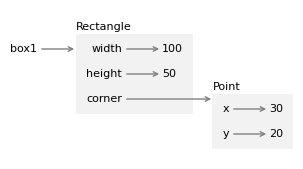

In [103]:
from diagram import Bbox

width, height, x, y = [2.83, 1.49, 0.27, 1.1]
ax = diagram(width, height)
bbox1 = binding_box1.draw(ax, x, y)
bbox2 = frame_corner1.draw(ax, x+1.85, y-0.6)
bbox = Bbox.union([bbox1, bbox2])
#adjust(x, y, bbox)

To draw a rectangle, we'll use the following method to make four `Point` objects to represent the corners.

In [104]:
%%add_method_to Rectangle

    def make_points(self):
        p1 = self.corner
        p2 = p1.translated(self.width, 0)
        p3 = p2.translated(0, self.height)
        p4 = p3.translated(-self.width, 0)
        return p1, p2, p3, p4

Then we'll make four `Line` objects to represent the sides.

In [105]:
%%add_method_to Rectangle

    def make_lines(self):
        p1, p2, p3, p4 = self.make_points()
        return Line(p1, p2), Line(p2, p3), Line(p3, p4), Line(p4, p1)

Then we'll draw the sides.

In [106]:
%%add_method_to Rectangle

    def draw(self):
        lines = self.make_lines()
        for line in lines:
            line.draw()

Here's an example.

In [107]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()

The figure includes two lines to represent the axes.

### Changing rectangles

Now let's consider two methods that modify rectangles, `grow` and `translate`.
We'll see that `grow` works as expected, but `translate` has a subtle bug.
See if you can figure it out before I explain.

`grow` takes two numbers, `dwidth` and `dheight`, and adds them to the `width` and `height` attributes of the rectangle.

In [108]:
%%add_method_to Rectangle

    def grow(self, dwidth, dheight):
        self.width += dwidth
        self.height += dheight

Here's an example that demonstrates the effect by making a copy of `box1` and invoking `grow` on the copy.

In [109]:
box2 = copy(box1)
box2.grow(60, 40)
print(box2)

Rectangle(160, 90, Point(30, 20))


If we draw `box1` and `box2`, we can confirm that `grow` works as expected.

In [110]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()
box2.draw()

Now let's see about `translate`.
It takes two numbers, `dx` and `dy`, and moves the rectangle the given distances in the `x` and `y` directions. 

In [111]:
%%add_method_to Rectangle

    def translate(self, dx, dy):
        self.corner.translate(dx, dy)

To demonstrate the effect, we'll translate `box2` to the right and down.

In [112]:
box2.translate(30, 20)
print(box2)

Rectangle(160, 90, Point(60, 40))


Now let's see what happens if we draw `box1` and `box2` again.

In [113]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()
box2.draw()

It looks like both rectangles moved, which is not what we intended!
The next section explains what went wrong.

### Deep copy

When we use `copy` to duplicate `box1`, it copies the `Rectangle` object but not the `Point` object it contains.
So `box1` and `box2` are different objects, as intended.

In [114]:
box1 is box2

False

But their `corner` attributes refer to the same object.

In [115]:
box1.corner is box2.corner

True

The following diagram shows the state of these objects.

In [116]:
from diagram import Stack
from copy import deepcopy

binding_box1, frame_corner1 = make_rectangle_binding('box1', box1)
binding_box2, frame_corner2 = make_rectangle_binding('box2', box2, dy=0.4)
binding_box2.value.bindings.reverse()

stack = Stack([binding_box1, binding_box2], dy=-1.3)

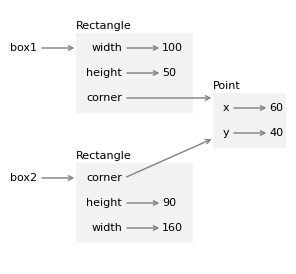

In [117]:
from diagram import Bbox

width, height, x, y = [2.76, 2.54, 0.27, 2.16]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = frame_corner1.draw(ax, x+1.85, y-0.6)
bbox = Bbox.union([bbox1, bbox2])
# adjust(x, y, bbox)

What `copy` does is called a **shallow copy** because it copies the object but not the objects it contains.
As a result, changing the `width` or `height` of one `Rectangle` does not affect the other, but changing the attributes of the shared `Point` affects both!
This behavior is confusing and error-prone.

Fortunately, the `copy` module provides another function, called `deepcopy`, that copies not only the object but also the objects it refers to, and the objects *they* refer to, and so on. 
This operation is called a **deep copy**.

To demonstrate, let's start with a new `Rectangle` that contains a new `Point`.

In [118]:
corner = Point(20, 20)
box3 = Rectangle(100, 50, corner)
print(box3)

Rectangle(100, 50, Point(20, 20))


And we'll make a deep copy.

In [119]:
from copy import deepcopy

box4 = deepcopy(box3)

We can confirm that the two `Rectangle` objects refer to different `Point` objects.

In [120]:
box3.corner is box4.corner

False

Because `box3` and `box4` are completely separate objects, we can modify one without affecting the other.
To demonstrate, we'll move `box3` and grow `box4`.

In [121]:
box3.translate(50, 30)
box4.grow(100, 60)

And we can confirm that the effect is as expected.

In [122]:
make_turtle()
line1.draw()
line2.draw()
box3.draw()
box4.draw()

## Debugging

Python provides several built-in functions that are useful for testing and debugging programs that work with objects.
For example, if you are not sure what type an object is, you can ask.

## Debugging

A `Time` object is valid if the values of `minute` and `second` are between `0` and `60` -- including `0` but not `60` -- and if `hour` is positive.
Also, `hour` and `minute` should be integer values, but we might allow `second` to have a fraction part.
Requirements like these are called **invariants** because they should always be true.
To put it a different way, if they are not true, something has gone wrong.

Writing code to check invariants can help detect errors and find their causes.
For example, you might have a method like `is_valid` that takes a Time object and returns `False` if it violates an invariant.

In [123]:
type(start)

__main__.Point

You can also use `isinstance` to check whether an object is an instance of a particular class.

In [124]:
isinstance(end, Time)

True

If you are not sure whether an object has a particular attribute, you
can use the built-in function `hasattr`.

In [125]:
hasattr(start, 'hour')

False

To get all of the attributes, and their values, in a dictionary, you can use `vars`.

In [126]:
vars(start)

{'x': 0, 'y': 0}

The `structshape` module, which we saw in [Chapter 11](section_debugging_11), also works with programmer-defined types.

In [127]:
download.download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/structshape.py');

In [128]:
from structshape import structshape

t = start, end
structshape(t)

'tuple of (Point, Time)'

## Debugging

In this chapter, we ran into a subtle bug that happened because we created a `Point` that was shared by two `Rectangle` objects, and then we modified the `Point`.
In general, there are two ways to avoid problems like this: you can avoid sharing objects or you can avoid modifying them.

To avoid sharing objects, you can use deep copy, as we did in this chapter.

To avoid modifying objects, consider replacing impure functions like `translate` with pure functions like `translated`.
For example, here's a version of `translated` that creates a new `Point` and never modifies its attributes.

## Glossary

```{glossary}
**object-oriented programming**
 A style of programming that uses objects to organize code and data.

**class**
 A programmer-defined type. A class definition creates a new class object.

**class object**
 An object that represents a class -- it is the result of a class definition.

**instantiation**
 The process of creating an object that belongs to a class.

**instance**
 An object that belongs to a class.

**attribute**
 A variable associated with an object, also called an instance variable.

**object diagram**
 A graphical representation of an object, its attributes, and their values.

**format specifier**
 In an f-string, a format specifier determines how a value is converted to a string.

**pure function**
 A function that does not modify its parameters or have any effect other than returning a value.

**functional programming style**
 A way of programming that uses pure functions whenever possible.

**prototype and patch**
 A way of developing programs by starting with a rough draft and gradually adding features and fixing bugs.

**design-first development**
 A way of developing programs with more careful planning that prototype and patch.

**object-oriented language**
 A language that provides features to support object-oriented programming, notably user-defined types.

**method**
 A function that is defined inside a class definition and is invoked on instances of that class.

**receiver**
 The object a method is invoked on.

**static method**
 A method that can be invoked without an object as receiver.

**instance method**
 A method that must be invoked with an object as receiver.

**special method**
 A method that changes the way operators and some functions work with an object.

**operator overloading**
 The process of using special methods to change the way operators with with user-defined types.

**invariant**
 A condition that should always be true during the execution of a program.

 **shallow copy**
 A copy operation that does not copy nested objects.

**deep copy**
 A copy operation that also copies nested objects.

**polymorphism**
 The ability of a method or operator to work with multiple types of objects.

```

## Exercises

In [129]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

There is a lot of new vocabulary in this chapter.
A conversation with a virtual assistant can help solidify your understanding.
Consider asking:

* "What is the difference between a class and a type?"

* "What is the difference between an object and an instance?"

* "What is the difference between a variable and an attribute?"

* "What are the pros and cons of pure functions compared to impure functions?"

Because we are just getting started with object oriented programming, the code in this chapter is not idiomatic -- it is not the kind of code experienced programmers write.
If you ask a virtual assistant for help with the exercises, you will probably see features we have not covered yet.
In particular, you are likely to see a method called `__init__` used to initialize the attributes of an instance.

If these features make sense to you, go ahead and use them.
But if not, be patient -- we will get there soon.
In the meantime, see if you can solve the following exercises using only the features we have covered so far.

Also, in this chapter we saw one example of a format specifier. For more information, ask "What format specifiers can be used in a Python f-string?"

### Ask a virtual assistant

For more information about static methods, ask a virtual assistant:

* "What's the difference between an instance method and a static method?"

* "Why are static methods called static?"

If you ask a virtual assistant to generate a static method, the result will probably begin with `@staticmethod`, which is a "decorator" that indicates that it is a static method.
Decorators are not covered in this book, but if you are curious, you can ask a VA for more information.

In this chapter we rewrote several functions as methods.
Virtual assistants are generally good at this kind of code transformation.
As an example, paste the following function into a VA and ask it, "Rewrite this function as a method of the `Time` class."

### Ask a virtual assistant

For all of the following exercises, consider asking a virtual assistant for help.
If you do, you'll want include as part of the prompt the class definitions for `Point`, `Line`, and `Rectangle` -- otherwise the VA will make a guess about their attributes and functions, and the code it generates won't work.

### Exercise

Write a function called `subtract_time` that takes two `Time` objects and returns the interval between them in seconds -- assuming that they are two times during the same day.

Here's an outline of the function to get you started.

In [130]:
def subtract_time(t1, t2):
    """Compute the difference between two times in seconds.
    
    >>> subtract_time(make_time(3, 2, 1), make_time(3, 2, 0))
    1
    >>> subtract_time(make_time(3, 2, 1), make_time(3, 0, 0))
    121
    >>> subtract_time(make_time(11, 12, 0), make_time(9, 40, 0))
    5520
    """
    return None

In [131]:
# Solution goes here

You can use `doctest` to test your function.

In [132]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(subtract_time)

**********************************************************************
File "__main__", line 4, in subtract_time
Failed example:
    subtract_time(make_time(3, 2, 1), make_time(3, 2, 0))
Expected:
    1
Got nothing
**********************************************************************
File "__main__", line 6, in subtract_time
Failed example:
    subtract_time(make_time(3, 2, 1), make_time(3, 0, 0))
Expected:
    121
Got nothing
**********************************************************************
File "__main__", line 8, in subtract_time
Failed example:
    subtract_time(make_time(11, 12, 0), make_time(9, 40, 0))
Expected:
    5520
Got nothing


### Exercise

Write a function called `is_after` that takes two `Time` objects and returns `True` if the first time is later in the day than the second, and `False` otherwise.

Here's an outline of the function to get you started.

In [133]:
def is_after(t1, t2):
    """Checks whether `t1` is after `t2`.
    
    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 0))
    True
    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 1))
    False
    >>> is_after(make_time(11, 12, 0), make_time(9, 40, 0))
    True
    """
    return None

In [134]:
# Solution goes here

You can use `doctest` to test your function.

In [135]:
run_doctests(is_after)

**********************************************************************
File "__main__", line 4, in is_after
Failed example:
    is_after(make_time(3, 2, 1), make_time(3, 2, 0))
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in is_after
Failed example:
    is_after(make_time(3, 2, 1), make_time(3, 2, 1))
Expected:
    False
Got nothing
**********************************************************************
File "__main__", line 8, in is_after
Failed example:
    is_after(make_time(11, 12, 0), make_time(9, 40, 0))
Expected:
    True
Got nothing


### Exercise

Here's a definition for a `Date` class that represents a date -- that is, a year, month, and day of the month.

In [136]:
class Date:
    """Represents a year, month, and day"""

1. Write a function called `make_date` that takes `year`, `month`, and `day` as parameters, makes a `Date` object, assigns the parameters to attributes, and returns the result the new object. Create an object that represents June 22, 1933.

2. Write a function called `print_date` that takes a `Date` object, uses an f-string to format the attributes, and prints the result. If you test it with the `Date` you created, the result should be `1933-06-22`.

3. Write a function called `is_after` that takes two `Date` objects as parameters and returns `True` if the first comes after the second. Create a second object that represents September 17, 1933, and check whether it comes after the first object.

Hint: You might find it useful to write a function called `date_to_tuple` that takes a `Date` object and returns a tuple that contains its attributes in year, month, day order.

You can use this function outline to get started.

In [137]:
def make_date(year, month, day):
    return None

In [138]:
# Solution goes here

You can use these examples to test `make_date`.

In [139]:
birthday1 = make_date(1933, 6, 22)

In [140]:
birthday2 = make_date(1933, 9, 17)

You can use this function outline to get started.

In [141]:
def print_date(date):
    print('')

In [142]:
# Solution goes here

You can use this example to test `print_date`.

In [143]:
print_date(birthday1)

You can use this function outline to get started.

In [144]:
def is_after(date1, date2):
    return None

In [145]:
# Solution goes here

In [146]:
# Solution goes here

You can use these examples to test `is_after`.

In [147]:
is_after(birthday1, birthday2)  # should be False

In [148]:
is_after(birthday2, birthday1)  # should be True

In [149]:
%%add_method_to Time

    def is_valid(self):
        if self.hour < 0 or self.minute < 0 or self.second < 0:
            return False
        if self.minute >= 60 or self.second >= 60:
            return False
        if not isinstance(self.hour, int):
            return False
        if not isinstance(self.minute, int):
            return False
        return True

Then, at the beginning of each method you can check the arguments to make sure they are valid.

In [150]:
%%add_method_to Time

    def is_after(self, other):
        assert self.is_valid(), 'self is not a valid Time'
        assert other.is_valid(), 'self is not a valid Time'
        return self.time_to_int() > other.time_to_int()

The `assert` statement evaluates the expression that follows. If the result is `True`, it does nothing; if the result is `False`, it causes an `AssertionError`.
Here's an example.

In [151]:
duration = Time(minute=132)
print(duration)

00:132:00


In [152]:
%%expect AssertionError

start.is_after(duration)

AttributeError: 'Point' object has no attribute 'is_after'

`assert` statements are useful because they distinguish code that deals with normal conditions from code that checks for errors.

## Exercises

In [153]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


In [154]:
def subtract_time(t1, t2):
    return time_to_int(t1) - time_to_int(t2)

### Exercise

In the previous chapter, a series of exercises asked you to write a `Date` class and several functions that work with `Date` objects.
Now let's practice rewriting those functions as methods.

1. Write a definition for a `Date` class that represents a date -- that is, a year, month, and day of the month.

2. Write an `__init__` method that takes `year`, `month`, and `day` as parameters and assigns the parameters to attributes. Create an object that represents June 22, 1933.

3. Write `__str__` method that uses an f-string to format the attributes and returns the result. If you test it with the `Date` you created, the result should be `1933-06-22`.

4. Write a method called `is_after` that takes two `Date` objects and returns `True` if the first comes after the second. Create a second object that represents September 17, 1933, and check whether it comes after the first object.

Hint: You might find it useful write a method called `to_tuple` that returns a tuple that contains the attributes of a `Date` object in year-month-day order.

In [155]:
# Solution goes here

You can use these examples to test your solution.

In [156]:
birthday1 = Date(1933, 6, 22)
print(birthday1)

TypeError: Date() takes no arguments

In [ ]:
birthday2 = Date(1933, 9, 17)
print(birthday2)

In [ ]:
birthday1.is_after(birthday2)  # should be False

In [ ]:
birthday2.is_after(birthday1)  # should be True

In [ ]:
    def translated(self, dx=0, dy=0):
        x = self.x + dx
        y = self.y + dy
        return Point(x, y)

Python provides features that make it easier to avoid modifying objects.
They are beyond the scope of this book, but if you are curious, ask a virtual assistant, "How do I make a Python object immutable?"

Creating a new object takes more time than modifying an existing one, but the difference seldom matters in practice.
Programs that avoid shared objects and impure functions are often easier to develop, test, and debug -- and the best kind of debugging is the kind you don't have to do.

## Exercises

In [ ]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

### Exercise

Write an `__eq__` method for the `Line` class that returns `True` if the `Line` objects refer to `Point` objects that are equivalent, in either order.

You can use the following outline to get started.

In [ ]:
%%add_method_to Line

def __eq__(self, other):
    return None

In [ ]:
# Solution goes here

You can use these examples to test your code.

In [ ]:
start1 = Point(0, 0)
start2 = Point(0, 0)
end = Point(200, 100)

This example should be `True` because the `Line` objects refer to `Point` objects that are equivalent, in the same order.

In [ ]:
line_a = Line(start1, end)
line_b = Line(start2, end)
line_a == line_b    # should be True

This example should be `True` because the `Line` objects refer to `Point` objects that are equivalent, in reverse order.

In [ ]:
line_c = Line(end, start1)
line_a == line_c     # should be True

Equivalence should always be transitive -- that is, if `line_a` and `line_b` are equivalent, and `line_a` and `line_c` are equivalent, then `line_b` and `line_c` should also be equivalent.

In [ ]:
line_b == line_c     # should be True

This example should be `False` because the `Line` objects refer to `Point` objects that are not equivalent.

In [ ]:
line_d = Line(start1, start2)
line_a == line_d    # should be False

### Exercise

Write a `Line` method called `midpoint` that computes the midpoint of a line segment and returns the result as a `Point` object.

You can use the following outline to get started.

In [ ]:
%%add_method_to Line

    def midpoint(self):
        return Point(0, 0)

In [ ]:
# Solution goes here

You can use the following examples to test your code and draw the result.

In [ ]:
start = Point(0, 0)
end1 = Point(300, 0)
end2 = Point(0, 150)
line1 = Line(start, end1)
line2 = Line(start, end2)

In [ ]:
mid1 = line1.midpoint()
print(mid1)

In [ ]:
mid2 = line2.midpoint()
print(mid2)

In [ ]:
line3 = Line(mid1, mid2)

In [ ]:
make_turtle()

for shape in [line1, line2, line3]:
    shape.draw()

### Exercise

Write a `Rectangle` method called `midpoint` that find the point in the center of a rectangle and returns the result as a `Point` object.

You can use the following outline to get started.

In [ ]:
%%add_method_to Rectangle

    def midpoint(self):
        return Point(0, 0)

In [ ]:
# Solution goes here

You can use the following example to test your code.

In [ ]:
corner = Point(30, 20)
rectangle = Rectangle(100, 80, corner)

In [ ]:
mid = rectangle.midpoint()
print(mid)

In [ ]:
diagonal = Line(corner, mid)

In [ ]:
make_turtle()

for shape in [line1, line2, rectangle, diagonal]:
    shape.draw()

### Exercise

Write a `Rectangle` method called `make_cross` that:

1. Uses `make_lines` to get a list of `Line` objects that represent the four sides of the rectangle.

2. Computes the midpoints of the four lines.

3. Makes and returns a list of two `Line` objects that represent lines connecting opposite midpoints, forming a cross through the middle of the rectangle.

You can use this outline to get started.

In [ ]:
%%add_method_to Rectangle

    def make_diagonals(self):
        return []

In [ ]:
# Solution goes here

You can use the following example to test your code.

In [ ]:
corner = Point(30, 20)
rectangle = Rectangle(100, 80, corner)

In [ ]:
### uncomment the following line to test your code

# lines = rectangle.make_cross()

In [ ]:
### uncomment the following lines to draw the rectangle and its diagonals

# make_turtle()

# rectangle.draw()
# for line in lines:
#     line.draw()

### Exercise

Write a definition for a class named `Circle` with attributes `center` and `radius`, where `center` is a Point object and `radius` is a number.
Include special methods `__init__` and a `__str__`, and a method called `draw` that uses `jupyturtle` functions to draw the circle.

You can use the following function, which is a version of the `circle` function we wrote in Chapter 4.

In [ ]:
from jupyturtle import make_turtle, forward, left, right
import math
    
def draw_circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    angle = 360 / n
    left(angle / 2)
    for i in range(n):
        forward(length)
        left(angle)

In [ ]:
# Solution goes here

You can use the following example to test your code.
We'll start with a square `Rectangle` with width and height `100`.

In [ ]:
corner = Point(20, 20)
rectangle = Rectangle(100, 100, corner)

The following code should create a `Circle` that fits inside the square.

In [ ]:
center = rectangle.midpoint()
radius = rectangle.height / 2

circle = Circle(center, radius)
print(circle)

If everything worked correctly, the following code should draw the circle inside the square (touching on all four sides).

In [ ]:
make_turtle(delay=0.01)

rectangle.draw()
circle.draw()